## Bias Variance

- Bias: It is the difference between the predicted values by a model and the actual values, and it represents how much a model’s predictions deviate from the correct values. High bias indicates that the model is underfitting the data, meaning it cannot capture the underlying patterns.
  
- Variance: It represents the variability of the model’s predictions for different training datasets. High variance indicates that the model is overfitting the data, meaning it memorises the training data and cannot generalise well to new, unseen data.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Generate some synthetic data with a non-linear relationship
np.random.seed(0)
x = np.linspace(-5, 5, num=100)
y = x ** 3 + np.random.normal(size=100)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [4]:
x_train.shape

(80,)

In [6]:
y_test.shape

(20,)

In [8]:
# x_train.reshape(-1, 1)

Consider a polynomial regression models with different degrees of polynomials (1,2,3,4,5)

In [9]:
degrees = [1, 2, 3, 4, 5]
train_errors, test_errors = [], []
for degree in degrees:
    # transform the features to polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    x_poly_train = poly_features.fit_transform(x_train.reshape(-1, 1))
    x_poly_test = poly_features.transform(x_test.reshape(-1, 1))

    # fit the linear regression model to the polynomial features
    model = LinearRegression()
    model.fit(x_poly_train, y_train)

    # evaluate the model on the training and testing data
    y_pred_train = model.predict(x_poly_train)
    y_pred_test = model.predict(x_poly_test)
    train_error = mean_squared_error(y_train, y_pred_train)
    test_error = mean_squared_error(y_test, y_pred_test)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [10]:
test_error

np.float64(0.8399674514960214)

In [11]:
test_errors

[np.float64(367.3606600042872),
 np.float64(367.8947051019574),
 np.float64(0.8264371039076593),
 np.float64(0.8460879311084902),
 np.float64(0.8399674514960214)]

In [12]:
train_error

np.float64(0.8507069379495789)

In [13]:
train_errors

[np.float64(383.7962422971568),
 np.float64(383.47137158406036),
 np.float64(0.8652384023554862),
 np.float64(0.8625013653765782),
 np.float64(0.8507069379495789)]

##### Plot

In [14]:
import matplotlib.pyplot as plt

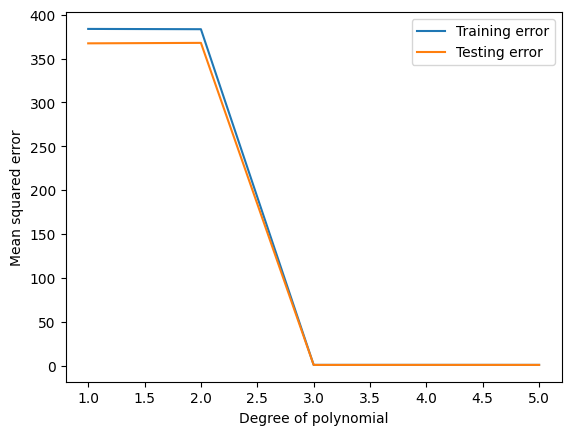

In [15]:
plt.plot(degrees, train_errors, label='Training error')
plt.plot(degrees, test_errors, label='Testing error')
plt.legend()
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean squared error')
plt.show()

Plot shows that the training error decreases as the degree of polynomial increases, indicating that the model becomes more complex and better fits the training data